### 随机漫步
下面通过内置的`random`模块以纯Python的方式实现1000步的随机漫步：

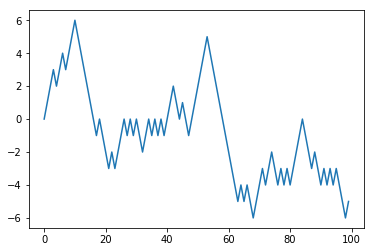

In [8]:
import numpy as np

import matplotlib.pyplot as plt

import random

position = 0
walk = [position]
steps = 1000;
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])

不难看出，这其实是随机漫步中各步的累计和，可以用一个数组运算来实现，这里用np.random模块一次性随机产生1000个“掷硬币”结果，将其分别设置为1或-1,然后累计和：

In [9]:
nstep = 1000

draws = np.random.randint(0,2, size = nstep)

steps = np.where(draws>0, 1, -1)

walk = np.cumsum(steps)

有了这些数据，就可以沿着漫步路径做一些统计工作了，比如求最大值和最小值

In [10]:
walk.min()

-17

In [11]:
walk.max()

35

现在来看一个复杂点的统计任务--首次穿越时间，即随机漫步过程中第一次到达某个特定值的时间。假设我们想要知道本次随机漫步需要多久才能距离初始0点至少10步远（任何方向均可）。np.abs(walk)>=10可以得到一个布尔型数组，它表示的是距离是否达到或超过10。而我们想要知道的是第一个10或-10的索引 。可以用argmax来解决这个问题。它返回的是该布尔数组第一个最大值的索引：

In [12]:
(np.abs(walk)>=10).argmax()

103

>注：这里使用argmax并不是很高效，因为它无论如何都要对数组进行完全扫描，在本例中只要发现第一个True，那我们就知道它是个最大值了。

#### 一次模拟多个随机漫步
如果想要模拟多个随机漫步过程，只要对上述的代码稍做调整。只要给numpy.random的函数传入一个二元元组就可以产生一个二维数组，然后我们就可以一次性计算多个随机漫步过程(一行一个)的累计和；下面给出一次计算5000个随机漫步过程的代码：

In [13]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size = (nwalks, nstep))

In [14]:
steps = np.where(draws>0, 1, -1)

In [15]:
walks = steps.cumsum(1)

In [16]:
walks

array([[  1,   2,   3, ..., -22, -23, -22],
       [ -1,  -2,  -1, ...,   0,   1,   2],
       [  1,   0,  -1, ...,  18,  17,  18],
       ...,
       [ -1,   0,   1, ...,  24,  25,  26],
       [  1,   2,   1, ..., -10,  -9,  -8],
       [  1,   2,   1, ..., -42, -43, -42]], dtype=int32)

现在，我们计算所有随机漫步过程的最大值和最小值:

In [17]:
walks.max()

118

In [18]:
walks.min()

-117

得到这些数据后，我们来计算30或-30的最小穿越时间，因为不是5000个过程都到达了30。我们可以用any方法对此进行检查：

In [19]:
hits30 = (np.abs(walks)>=30).any(1)

In [20]:
hits30

array([False, False,  True, ...,  True,  True,  True])

In [21]:
hits30.sum()

3388

然后我们利用这个布尔型数组选出那些穿越30的随机漫步，并调用argmax在軕1上获取穿越时间

In [23]:
crossing_time = (np.abs(walks[hits30])>=30).argmax(1)

In [24]:
crossing_time.mean()

507.4722550177096